### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # fast but only linear
from sklearn.svm import SVC  # slower but can do kernels

In [2]:
# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

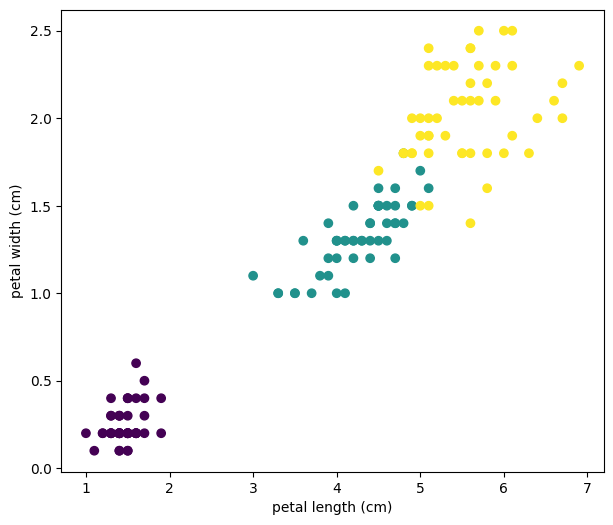

In [3]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [4]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

#### Exercise 1. Split the data into training set and test set.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Exercise 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

Training LinearSVC with C = 0.01


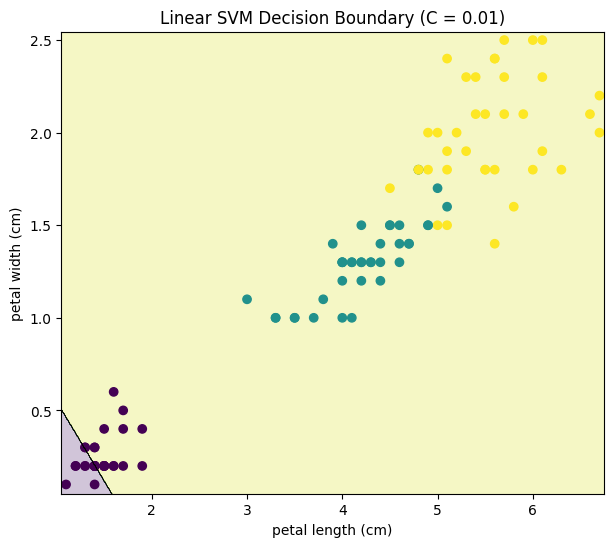

Training LinearSVC with C = 0.1


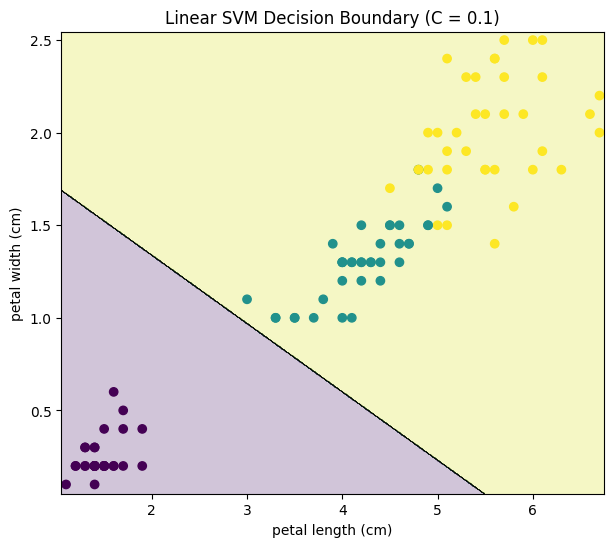

Training LinearSVC with C = 1.0


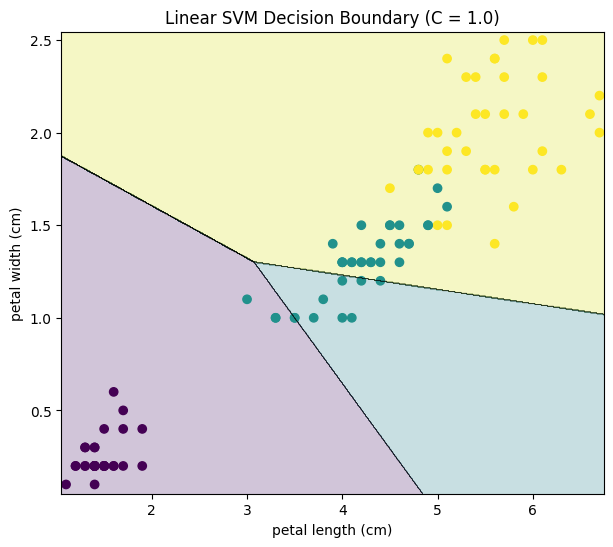

Training LinearSVC with C = 10.0


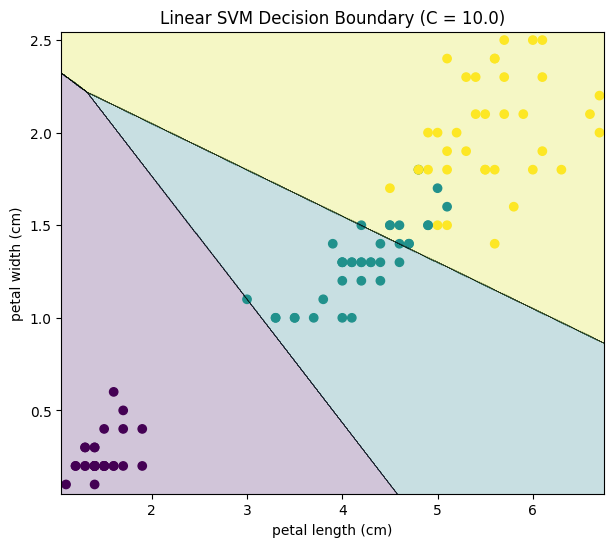

Training LinearSVC with C = 100.0


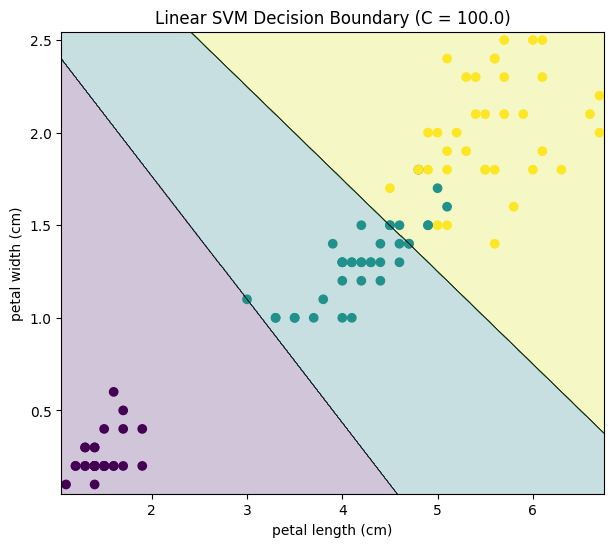

In [7]:
C_values = [0.01, 0.1, 1.0, 10.0, 100.0]

for C_val in C_values:
    print(f"Training LinearSVC with C = {C_val}")

    linear_svm = LinearSVC(loss='hinge', C=C_val, random_state=42, max_iter=100000)
    linear_svm.fit(X_train, y_train)

    plot_decision_boundary(linear_svm, X_train, y_train)
    plt.title(f'Linear SVM Decision Boundary (C = {C_val})')
    plt.show()

#### Exercise 3. Pick a value of `C` that you like. Then report the test error.

In [9]:
from sklearn.metrics import accuracy_score

chosen_C = 1.0

print(f"Training LinearSVC with chosen C = {chosen_C}")
linear_svm_final = LinearSVC(loss='hinge', C=chosen_C, random_state=42, max_iter=100000)
linear_svm_final.fit(X_train, y_train)

y_pred = linear_svm_final.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
test_error = 1 - accuracy

print(f"Test Accuracy with C = {chosen_C}: {accuracy:.4f}")
print(f"Test Error with C = {chosen_C}: {test_error:.4f}")

Training LinearSVC with chosen C = 1.0
Test Accuracy with C = 1.0: 0.7556
Test Error with C = 1.0: 0.2444


#### Exercise 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

Training SVC with kernel='rbf', C=1.0, gamma = 0.01


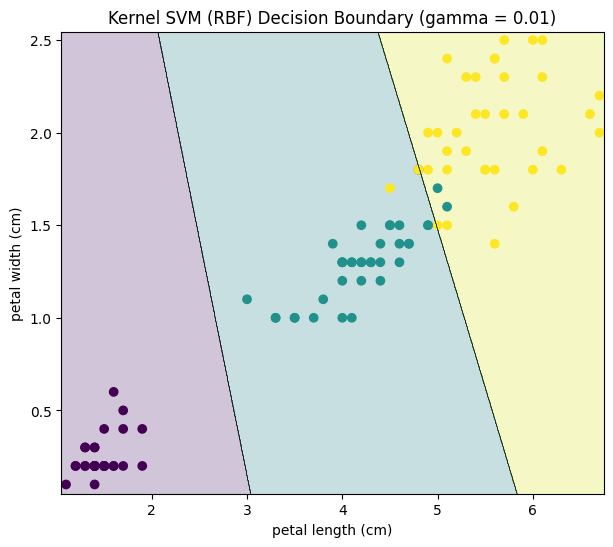

Training SVC with kernel='rbf', C=1.0, gamma = 0.1


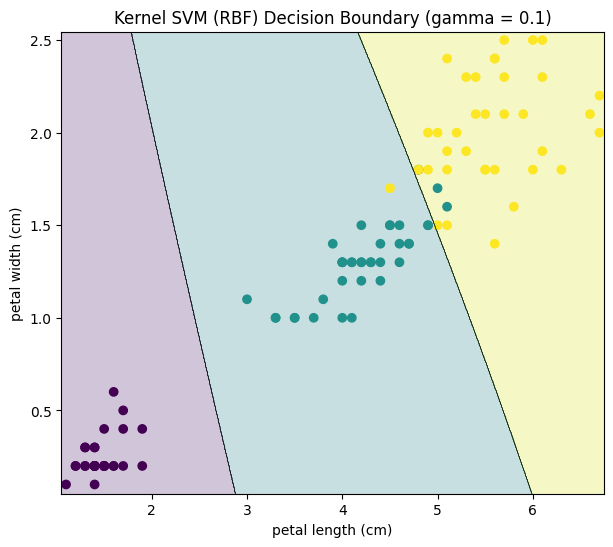

Training SVC with kernel='rbf', C=1.0, gamma = 1.0


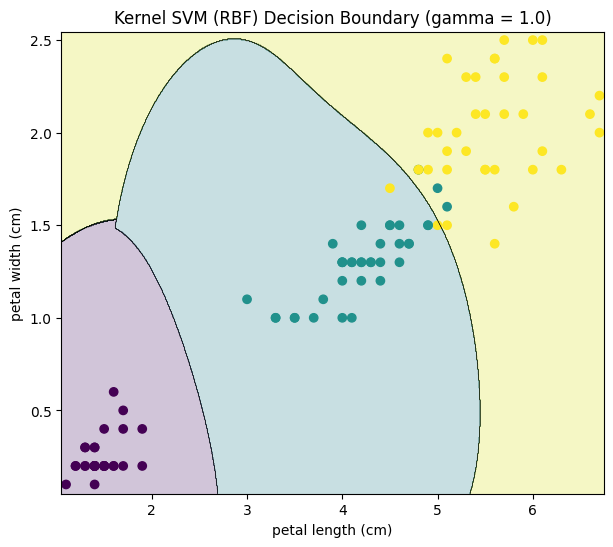

Training SVC with kernel='rbf', C=1.0, gamma = 10.0


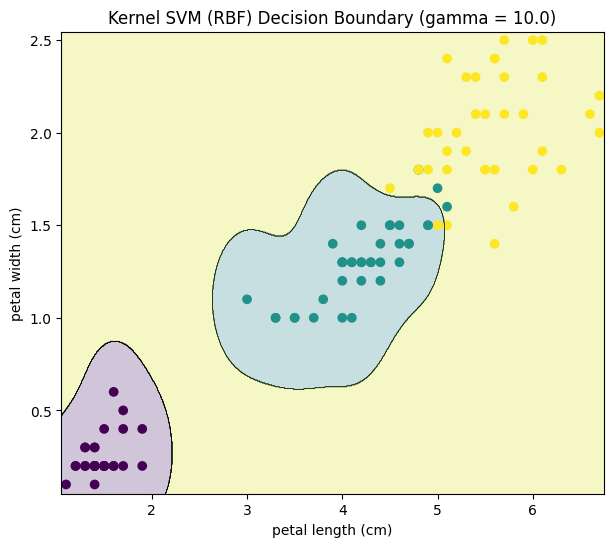

Training SVC with kernel='rbf', C=1.0, gamma = 100.0


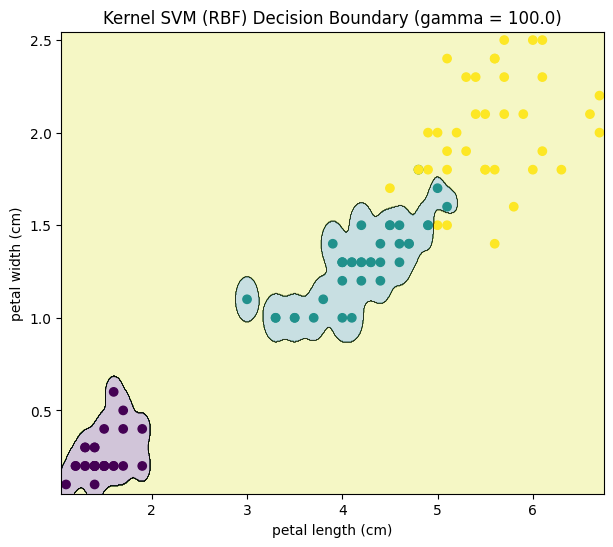

In [10]:
gamma_values = [0.01, 0.1, 1.0, 10.0, 100.0]
C_rbf = 1.0

for gamma_val in gamma_values:
    print(f"Training SVC with kernel='rbf', C={C_rbf}, gamma = {gamma_val}")

    kernel_svm = SVC(kernel='rbf', C=C_rbf, gamma=gamma_val, random_state=42, max_iter=100000)
    kernel_svm.fit(X_train, y_train)

    plot_decision_boundary(kernel_svm, X_train, y_train)
    plt.title(f'Kernel SVM (RBF) Decision Boundary (gamma = {gamma_val})')
    plt.show()

#### Exercise 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

In [11]:
from sklearn.metrics import accuracy_score

chosen_gamma = 0.1
chosen_C_rbf = 1.0

print(f"Training Kernel SVM (RBF) with C = {chosen_C_rbf}, gamma = {chosen_gamma}")
kernel_svm_final = SVC(kernel='rbf', C=chosen_C_rbf, gamma=chosen_gamma, random_state=42, max_iter=100000)
kernel_svm_final.fit(X_train, y_train)

y_pred_kernel = kernel_svm_final.predict(X_test)

accuracy_kernel = accuracy_score(y_test, y_pred_kernel)
test_error_kernel = 1 - accuracy_kernel

num_support_vectors = kernel_svm_final.n_support_.sum()

print(f"Test Accuracy with C = {chosen_C_rbf}, gamma = {chosen_gamma}: {accuracy_kernel:.4f}")
print(f"Test Error with C = {chosen_C_rbf}, gamma = {chosen_gamma}: {test_error_kernel:.4f}")
print(f"Number of Support Vectors: {num_support_vectors}")

Training Kernel SVM (RBF) with C = 1.0, gamma = 0.1
Test Accuracy with C = 1.0, gamma = 0.1: 1.0000
Test Error with C = 1.0, gamma = 0.1: 0.0000
Number of Support Vectors: 41


#### Exercise 6. Between Linear SVM and Kernel SVM, which model would you prefer to use for classification of Iris data?
1. Explain using test accuracy
2. Explaing using decision boundary plot

1. เลือก: Kernel SVM (RBF)
Kernel SVM ให้ความแม่นยำ 100%
Linear SVM ไม่สามารถแยกข้อมูล Iris ได้สมบูรณ์แบบด้วยเส้นตรง
Kernel SVM สามารถสร้าง decision boundary แบบโค้ง  จับความสัมพันธ์ที่ไม่เป็นเชิงเส้นได้ดีกว่า

2. Linear SVM
เส้นแบ่งเป็น เส้นตรง
ไม่สามารถแยกคลาส versicolor กับ virginica ได้ดี
มีจุดทับซ้อน  เกิด misclassification